# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/DL%20Spring%202023/Module%204-%20Deep%20Neural%20Networks/DNN_python/Module%204-%20DNN%20tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install 



In [1]:
import tensorflow 
tensorflow.__version__

'2.11.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In this notebook, we will be working with mnist data set: https://en.wikipedia.org/wiki/MNIST_database
* 60,000 train images 
* 10,000 test images 
* image size (28,28)

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

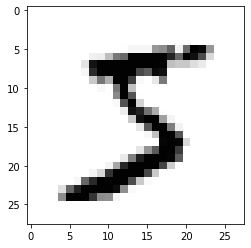

In [8]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Convolutional Neural Networks (CNN)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
# reshaping 
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')
    
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
       
    return model 

In [17]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [18]:
# params
1*(3*3)*32 + 32 

320

In [19]:
32*(3*3)*64+64

18496

In [20]:
64*(3*3)*128+128

73856

In [21]:
3*3*128

1152

In [22]:
1152*10+10

11530

output shape: 
* channels are the number of filters
* new size = $floor(\frac{n_{old} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [23]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32) 
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [24]:
history = model.fit(x=x_train, y=y_train, 
          validation_data=(x_test, y_test), 
          epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 5ms/step - loss: 0.1620 - accuracy: 0.9498 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0319 - val_accuracy: 0.9899
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0258 - val_accuracy: 0.9912
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0354 - val_accuracy: 0.9895


In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9895


[0.03541973605751991, 0.9894999861717224]

As you can see, the CNN performs better in the test set with +99% accuracy.

## Model evaluation

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
metrics = pd.DataFrame(history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.162021,0.949783,0.043998,0.9851
1,0.042511,0.986517,0.031873,0.9899
2,0.029430,0.991083,0.025843,0.9912
3,0.022192,0.993017,0.026942,0.9914
4,0.017449,0.994267,0.035420,0.9895


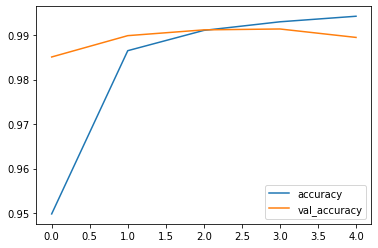

In [29]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

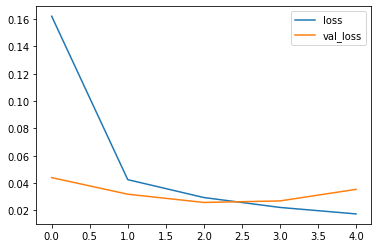

In [30]:
metrics[['loss','val_loss']].plot()
plt.show()

In [31]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 [==============================] - 1s 2ms/step


array([4.7250565e-11, 3.0881073e-10, 2.0902217e-08, 4.4477566e-10,
       1.1238061e-13, 2.4557246e-12, 9.2153489e-16, 1.0000000e+00,
       2.3896976e-10, 4.2238335e-10], dtype=float32)

In [32]:
y_test[0]

7

let's generate prediction classes: 
* For binary classification, np.where(y_pred > threshold, 1,0)
* For multiclass classification, np.argmax(predictions, axis=1)

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead




In [33]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([7, 2, 1, 0, 4])

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
confusion_matrix(y_test,predictions)

array([[ 977,    1,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1026,    0,    1,    0,    0,    1,    1,    0],
       [   0,    1,    3, 1002,    0,    3,    0,    1,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   2,    0,    0,    3,    0,  882,    1,    1,    1,    2],
       [   5,    4,    0,    0,    3,    8,  938,    0,    0,    0],
       [   0,    5,    9,    0,    0,    0,    0, 1013,    0,    1],
       [   4,    0,    3,    0,    0,    2,    0,    2,  961,    2],
       [   2,    1,    1,    0,   12,    4,    0,    3,    6,  980]])

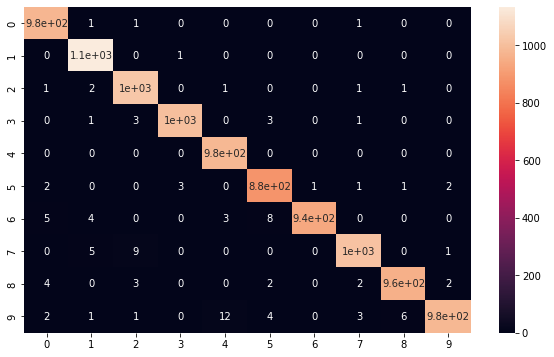

In [37]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

Let's look into some of the misclassified images!

In [38]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [39]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[62, 359, 445, 449, 495, 582, 659, 813, 947]

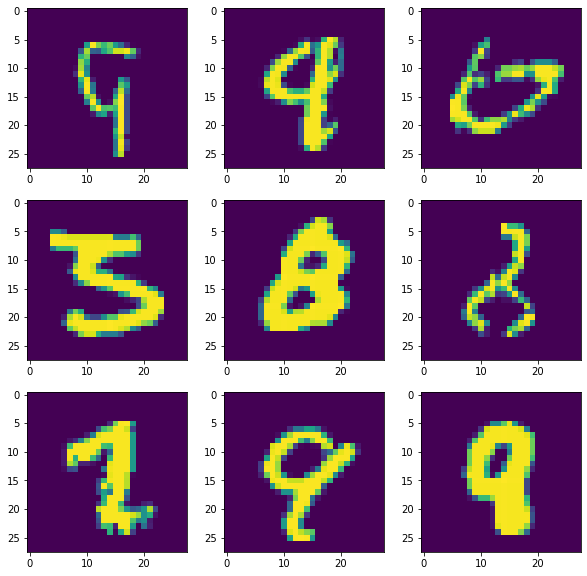

In [40]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28)) 
  actuals.append(y_test[number])
plt.show() 

In [41]:
actuals

[9, 9, 6, 3, 8, 8, 2, 9, 8]

#Done